In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm

In [20]:
file = '../../../Documentos/Dado-Real/Goias/AREA_I/GDB_XYZ/Mag.XYZ'
#file = 'test_real_data.txt'
names = ['Y','X','GPSALT','ALTURA','MAGRAW','MAGIGRF','IGRF','LONG','LAT']
dataframe = 'diorama_large.txt'
decimated = 'diorama_large_decimated.txt'

In [21]:
lat1=[]
long1=[]
y=[]
x=[]
d=[]
igrf1=[]
z = []
l = []
t = []

with open(file) as infile:
    for line in infile:
        if line[:4]=='Line':
            number = line
            pass
        elif line[:3]=='/ -':
            pass
        elif line[135:136]=='*':
            pass	
#       elif (line[63:66]=='-19' or line[63:66]=='-20') and (line[77:80]=='-51' or line[77:80]=='-52' or line[77:80]=='-53'):
        #elif (line[59:62]=='-49') and (line[71:74]=='-27'):
        elif (line[149:152]=='-51') and (line[161:164]=='-16'):
#            anitápolis
#             x.append(line[4:10])
#             y.append(line[14:21])
#             z.append(line[23:30])
#             lat1.append(line[71:81])
#             long1.append(line[59:69])
#             d.append(line[169:178])
#             l.append(number[6:11])
#             t.append(line[42:48])

#            diorama
            x.append(line[2:11])
            y.append(line[13:23])
            z.append(line[35:41])
            lat1.append(line[161:171])
            long1.append(line[149:159])
            d.append(line[127:136])
            l.append(number[6:11])
            t.append(line[52:59])
            
        elif line[0]=='T':
            break

In [22]:
lat=filter(None,lat1)
long=filter(None,long1)
ycord=filter(None,y)
xcord=filter(None,x)
zcord=filter(None,z)
data=filter(None,d)
alt=filter(None,t)

In [23]:
len(alt)

1844456

In [24]:
out=np.array([xcord,ycord,zcord,alt,long,lat,data])        
out=out.T.astype(np.float)

In [25]:
dic={'Line':l, 'Y':out[:,0],'X':out[:,1],
    'GPSALT':out[:,2],'ALTURA':out[:,3],'LONG':out[:,4],
    'LAT':out[:,5],'MAGIGRF':out[:,6]}

In [26]:
dataset = pd.DataFrame(dic)

In [27]:
#mask = (dataset['LONG'] <= -49.) & (dataset['LONG'] >= -49.20) & (dataset['LAT'] <= -27.7) & (dataset['LAT'] >= -27.99)
mask = (dataset['LONG'] <= -51.12) & (dataset['LONG'] >= -51.28) & (dataset['LAT'] <= -16.08) & (dataset['LAT'] >= -16.24)
dataset[mask].to_csv(dataframe, index=None, sep=' ', mode='w')

In [28]:
dataset[mask].iloc[range(0, dataset[mask].shape[0], 15)].to_csv(decimated, index=None, sep=' ', mode='w')

In [29]:
tfa_complete = pd.read_csv('diorama_large.txt', skipinitialspace=True, delim_whitespace=True)
tfa_decimated = pd.read_csv('diorama_large_decimated.txt', skipinitialspace=True, delim_whitespace=True)

In [30]:
yc = tfa_complete['Y'].get_values()
xc = tfa_complete['X'].get_values()
dc = tfa_complete['MAGIGRF'].get_values()
lat = tfa_complete['LAT'].get_values()
long = tfa_complete['LONG'].get_values()
alt = tfa_decimated['ALTURA'].get_values()
gps = -tfa_decimated['GPSALT'].get_values()

yd = tfa_decimated['Y'].get_values()
xd = tfa_decimated['X'].get_values()
dd = tfa_decimated['MAGIGRF'].get_values()

In [31]:
np.min(gps+alt)

-831.1800000000001

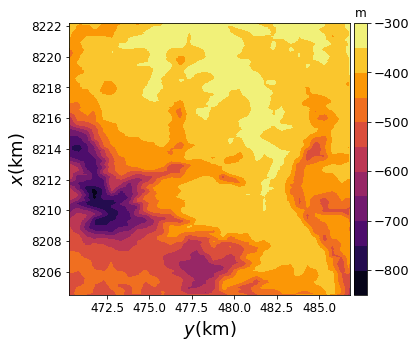

In [32]:
plt.figure(figsize=(6,5))
#plt.title('Residual', fontsize=20)
#plt.tricontour(inversion['y'], inversion['x'], inversion['residual'], 10, linewidths=0.5, colors='w')
plt.tricontourf(yd/1000., xd/1000., gps+alt, 10, cmap='inferno').ax.tick_params(labelsize=12)
#plt.plot(yp, xp, 'ko', markersize=1.)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('m')
clb.ax.tick_params(labelsize=13)
plt.show()
#img(filename=mypath+'complex_tfa_residual.png', width=1600, height=400)

In [33]:
np.max(alt)

321.31

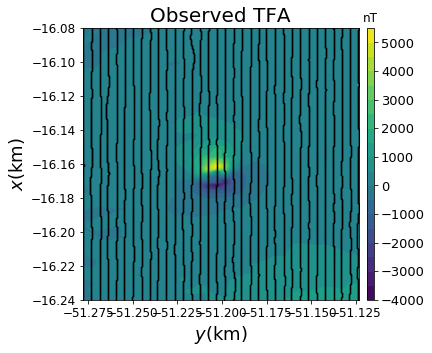

In [34]:
plt.figure(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(long, lat, dc, 20, cmap='viridis').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
plt.plot(long,lat, 'ok', markersize=0.2)
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
#mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
#plt.savefig(mypath+'diorama_real_data.png', dpi=300)
plt.show()
#img(filename=mypath+'diorama_real_data.png', width=1000, height=1200)

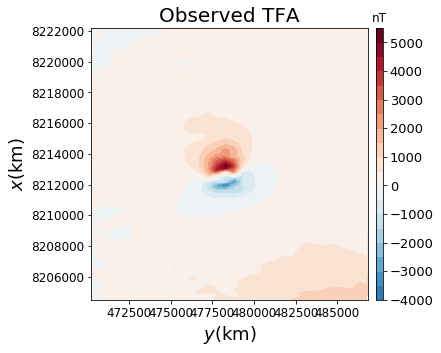

In [35]:
fig, ax = plt.subplots(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(yd, xd, dd, 20, cmap='RdBu_r', vmax=np.max(dd), vmin=-np.max(dd)).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.plot(yd,xd, 'ok', markersize=1)
#circle = plt.Circle((478200., 8212800.), 2000., color='k', alpha=0.2)
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
#mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
#plt.savefig(mypath+'diorama_real_data.png', dpi=300)
#ax.add_artist(circle)
plt.show()
#img(filename=mypath+'diorama_real_data.png', width=1000, height=1200)

In [18]:
dc

array([ -43.907,  -43.933,  -43.946, ..., 1103.946, 1104.86 , 1106.186])